In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns   

In [10]:
df = pd.read_excel('Тестовое задание - Анализ заказов ПВЗ (данные).xlsx', index_col=0)
df.head(2)

,Day,DelivType,PymentType,Journal_id,_ktt1,_ktt2,_ktt3,_itemid,_colorid,_Approved_USD,_Approved_PCS,_Net_USD,_Net_PCS
Week,,,,,,,,,,,,,
Week 17 (23.11.20-29.11.20),2020-11-27,ЦУМ - Самовывоз,Prepaid,EO01386067,Товары для мужчин,Аксессуары из кожи,Ремни,7625454,Черный_BLACK,360.803788,1,0.000000,0
Week 23 (04.01.21-10.01.21),2021-01-09,ЦУМ - Самовывоз,Postpaid,EO01496554,Товары для мужчин,Аксессуары из кожи,Ремни,7625454,Черный_BLACK,240.875404,1,240.875404,1


In [60]:
df.describe()

,_itemid,_Approved_USD,_Approved_PCS,_Net_USD,_Net_PCS
count,5.254660e+05,525466.000000,525466.000000,525466.000000,525466.000000
mean,6.675314e+06,525.525699,0.892846,264.666047,0.642369
std,1.378684e+06,517.953851,0.558436,447.367381,0.583245
min,4.008842e+06,0.000000,0.000000,0.000000,0.000000
25%,4.749996e+06,111.675645,1.000000,0.000000,0.000000
50%,7.305565e+06,402.665204,1.000000,12.000000,1.000000
75%,7.655575e+06,791.733716,1.000000,401.252286,1.000000
max,7.995595e+06,26381.513898,33.000000,15581.906692,33.000000


In [61]:
df.describe(include='object')

,DelivType,PymentType,Journal_id,_ktt1,_ktt2,_ktt3,_colorid
count,525466,525466,525466,525466,525466,525466,421490
unique,1,2,195760,4,11,154,27537
top,ЦУМ - Самовывоз,Postpaid,EO01583735,Товары для женщин,Одежда,Услуги,Черный_BLACK
freq,525466,490577,66,266291,210592,103088,18723


In [62]:
print(df['_ktt2'].unique())#уточнить у бизнеса 'Домашняя, пляжная одежда' не требует примерки?

['Аксессуары из кожи' 'Бижутерия' 'Одежда' 'Аксессуары' 'Обувь' 'Сумки'
 'Подарочные карты' 'Домашняя, пляжная одежда' 'Рюкзак дорожный' 'Чемодан'
 'Услуги']


In [63]:
df['Month'] = df['Day'].dt.to_period('M')
confirmed_orders = df[df['_Approved_PCS'] > 0]


In [71]:
df[df['_ktt2'] == 'Услуги']['_Approved_PCS'].sum() # Заказ услуги не подтверждался ни разу.

0

In [64]:
print(confirmed_orders['_ktt2'].unique()) # 

['Аксессуары из кожи' 'Бижутерия' 'Одежда' 'Аксессуары' 'Обувь' 'Сумки'
 'Подарочные карты' 'Домашняя, пляжная одежда' 'Рюкзак дорожный' 'Чемодан']


In [44]:
# Grouping by Journal_id and calculating count of _ktt2 for each item
order_statistics = confirmed_orders.groupby(['Journal_id', 'Month']).agg({
    '_ktt2': lambda x: x.value_counts().to_dict(),
    '_Approved_PCS': 'sum',  # Total items in the order
    '_Approved_USD': 'sum',  # Total value of the order
    '_Net_PCS': 'sum',       # Total confirmed items
    '_Net_USD': 'sum'        # Total confirmed value
}).reset_index()

# Renaming columns for clarity
order_statistics.rename(columns={
    '_ktt2': 'KTT2_Count_Per_Item',
    '_Approved_PCS': 'Total_Items_Ordered',
    '_Approved_USD': 'Total_Order_Value',
    '_Net_PCS': 'Total_Bought_Items',
    '_Net_USD': 'Total_Bought_Value'
}, inplace=True)

# Expand _ktt2 counts into separate columns within the same dataframe
expanded_ktt2_counts = order_statistics['KTT2_Count_Per_Item'].apply(pd.Series).fillna(0).astype(int)
order_statistics_expanded = pd.concat([order_statistics, expanded_ktt2_counts], axis=1).drop('KTT2_Count_Per_Item', axis=1)

In [58]:
order_statistics['KTT2_Count_Per_Item']

0         {'Аксессуары': 4, 'Аксессуары из кожи': 2}
1                                       {'Обувь': 1}
2                    {'Домашняя, пляжная одежда': 1}
3                                       {'Обувь': 2}
4                                      {'Одежда': 1}
                             ...                    
178231                                  {'Обувь': 3}
178232                     {'Одежда': 4, 'Обувь': 3}
178233                                  {'Обувь': 1}
178234                                  {'Обувь': 2}
178235                             {'Аксессуары': 5}
Name: KTT2_Count_Per_Item, Length: 178236, dtype: object

In [47]:
order_statistics_expanded.head(2)

,Journal_id,Month,Total_Items_Ordered,Total_Order_Value,Total_Confirmed_Items,Total_Confirmed_Value,Аксессуары,Аксессуары из кожи,Обувь,"Домашняя, пляжная одежда",Одежда,Сумки,Бижутерия,Подарочные карты,Рюкзак дорожный,Чемодан
0,EO01310953,2020-10,6,4917.500990,0,0.0,4,2,0,0,0,0,0,0,0,0
1,EO01310959,2020-10,1,1399.123632,0,0.0,0,0,1,0,0,0,0,0,0,0


In [107]:
order_statistics_expanded['Group'] = 'другие'
order_statistics_expanded.loc[order_statistics_expanded['Одежда']>=1, 'Group'] = 'нужна примерка в примерочной'
order_statistics_expanded.loc[order_statistics_expanded['Обувь']  == order_statistics_expanded['Total_Items_Ordered'], 'Group'] = 'легко примерить в зале'
order_statistics_expanded.loc[order_statistics_expanded['Сумки'] == order_statistics_expanded['Total_Items_Ordered'], 'Group'] = 'примерка не нужна'
order_statistics_expanded.head(5)

,Journal_id,Month,Total_Items_Ordered,Total_Order_Value,Total_Confirmed_Items,Total_Confirmed_Value,Аксессуары,Аксессуары из кожи,Обувь,"Домашняя, пляжная одежда",Одежда,Сумки,Бижутерия,Подарочные карты,Рюкзак дорожный,Чемодан,group,Group
0,EO01310953,2020-10,6,4917.500990,0,0.000000,4,2,0,0,0,0,0,0,0,0,0,другие
1,EO01310959,2020-10,1,1399.123632,0,0.000000,0,0,1,0,0,0,0,0,0,0,2,легко примерить в зале
2,EO01310961,2020-10,1,69.434180,1,69.434180,0,0,0,1,0,0,0,0,0,0,0,другие
3,EO01310963,2020-10,2,2633.112600,0,0.000000,0,0,2,0,0,0,0,0,0,0,2,легко примерить в зале
4,EO01310966,2020-10,1,864.152849,1,864.152849,0,0,0,0,1,0,0,0,0,0,1,нужна примерка в примерочной


In [141]:
res = order_statistics_expanded.groupby(['Month', 'Group'])['Journal_id'].count().reset_index().rename(columns={"Journal_id": 'Order_count'})
res['Percentage_Total_Count'] = res.groupby('Month')['Order_count'].transform(lambda x: (x / x.sum()) * 100)

res.head()

,Month,Group,Order_count,Percentage_Total_Count
0,2020-10,другие,1491,27.832742
1,2020-10,легко примерить в зале,1105,20.627217
2,2020-10,нужна примерка в примерочной,2543,47.470599
3,2020-10,примерка не нужна,218,4.069442
4,2020-11,другие,2764,29.723626


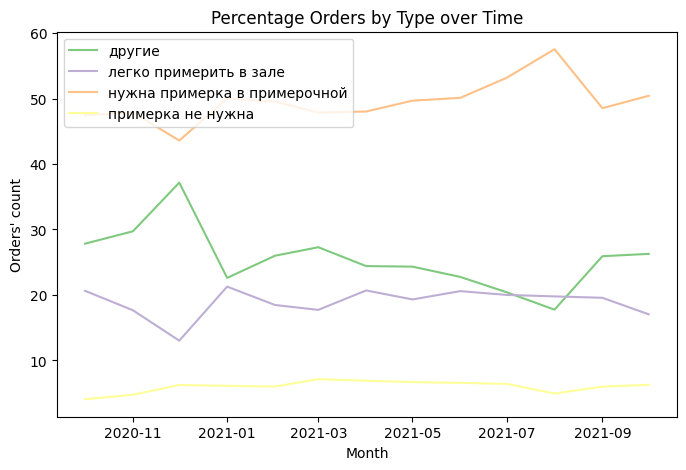

In [144]:

#res['Month'] = res['Month'].dt.to_timestamp()
#res['Order_count'] = pd.to_numeric(res['Order_count'])

plt.figure(figsize=(8, 5))
sns.lineplot(data=res, x='Month', y='Percentage_Total_Count', hue='Group', palette='Accent')
plt.title('Percentage Orders by Type over Time')
plt.xlabel('Month')
plt.ylabel("Orders' count")
plt.legend(loc='upper left')
plt.show()


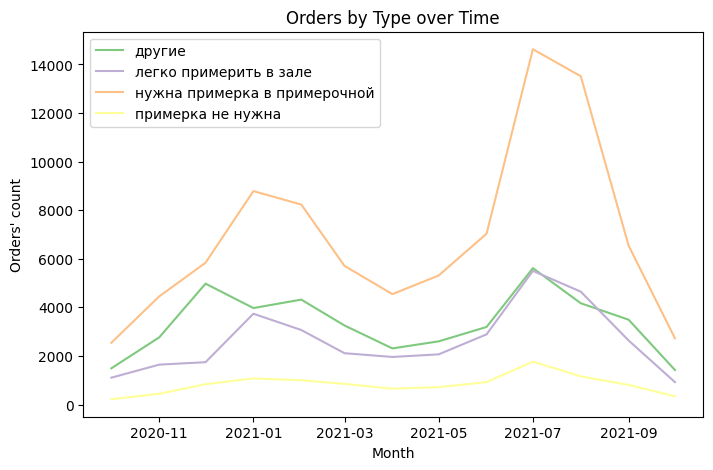

In [145]:
plt.figure(figsize=(8, 5))
sns.lineplot(data=res, x='Month', y='Order_count', hue='Group', palette='Accent')
plt.title('Orders by Type over Time')
plt.xlabel('Month')
plt.ylabel("Orders' count")
plt.legend(loc='upper left')
plt.show()

Text(0.5, 0, 'Month')

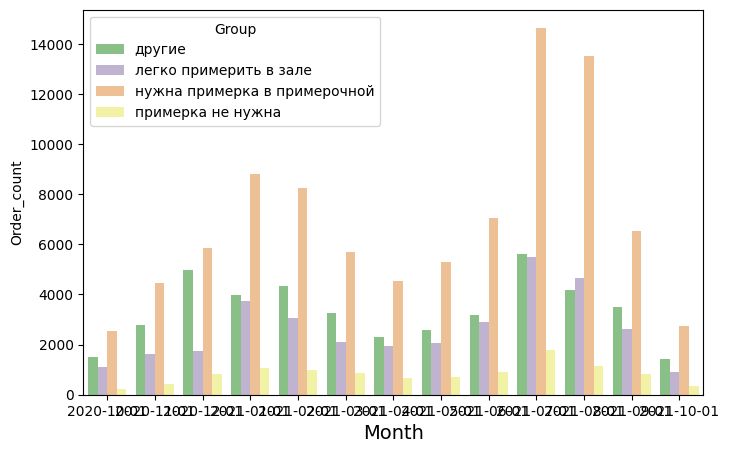

In [147]:
plt.figure(figsize=(8, 5))
sns.barplot(data=res, x='Month', y='Order_count', hue='Group', palette='Accent')
plt.tick_params(axis='both', which='major', labelsize=5)

<AxesSubplot: xlabel='Group', ylabel='Percentage_Total_Count'>

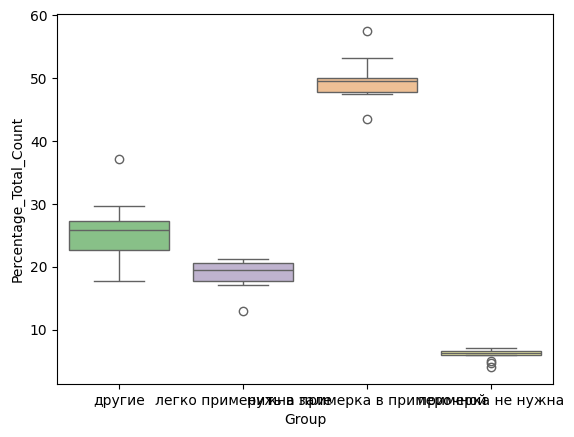

In [152]:
sns.boxplot(data=res, x='Group', y='Percentage_Total_Count', hue='Group', palette='Accent')

<AxesSubplot: xlabel='Group', ylabel='Order_count'>

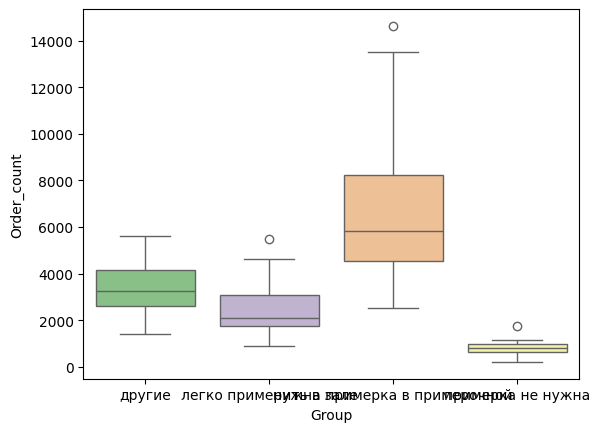

In [120]:
sns.boxplot(data=res, x='Group', y='Order_count', hue='Group', palette='Accent')

In [151]:
# Calculate other aggregations including max, min, median, mean, IQR, percentile 25 and 75
additional_aggregations = res.groupby(['Group'])['Order_count'].agg([
    'max', 'min', 'median', 'mean',
    lambda x: x.quantile(0.75) - x.quantile(0.25),  # IQR
    lambda x: x.quantile(0.25),  # 25th percentile
    lambda x: x.quantile(0.75)
]).reset_index().rename(columns={
    '<lambda_0>': 'IQR',
    '<lambda_1>': '25th_percentile',
    '<lambda_2>': '75th_percentile'
})
additional_aggregations = additional_aggregations.round(2)
additional_aggregations

,Group,max,min,median,mean,IQR,25th_percentile,75th_percentile
0,другие,5615,1420,3254.0,3352.00,1569.0,2601.0,4170.0
1,легко примерить в зале,5503,921,2113.0,2617.38,1325.0,1743.0,3068.0
2,нужна примерка в примерочной,14628,2543,5837.0,6911.85,3688.0,4545.0,8233.0
3,примерка не нужна,1766,218,836.0,829.23,346.0,652.0,998.0


In [150]:
# Calculate other aggregations including max, min, median, mean, IQR, percentile 25 and 75
additional_aggregations_percentage = res.groupby(['Group'])['Percentage_Total_Count'].agg([
    'max', 'min', 'median', 'mean',
    lambda x: x.quantile(0.75) - x.quantile(0.25),  # IQR
    lambda x: x.quantile(0.25),  # 25th percentile
    lambda x: x.quantile(0.75)  # 75th percentile
]).reset_index().rename(columns={
    '<lambda_0>': 'IQR',
    '<lambda_1>': '25th_percentile',
    '<lambda_2>': '75th_percentile'
})
additional_aggregations_percentage = additional_aggregations_percentage.round(2)
additional_aggregations_percentage

,Group,max,min,median,mean,IQR,25th_percentile,75th_percentile
0,другие,37.16,17.75,25.92,25.57,4.54,22.75,27.29
1,легко примерить в зале,21.27,13.02,19.56,18.90,2.86,17.72,20.58
2,нужна примерка в примерочной,57.53,43.59,49.54,49.52,2.24,47.87,50.11
3,примерка не нужна,7.14,4.07,6.24,6.01,0.57,5.99,6.56


# Выводы

Группа "легко примерить в зале" составляет около 20% от всех заказов и в 2.5. раза меньше заказов категории "нужна примерка в примерочной". При допущении, что места для примерки обуви уже есть в ПВЗ, значительно увеличить эффективность обслуживания за счёт дополнительного места для примерки обуви не представляется возможным.

Группа "примерка не нужна" имеет наименьшее среднее количество заказов. Тем не менее для данной категории постамат потенциально может уменьшить время обслуживания (при допущении, что ранее для данной категории приходилось стоять в общей очереди).

В группе "нужна примерка в примерочной" наблюдается более высокое количество заказов по сравнению с группами "легко примерить в зале" и "примерка не нужна". Здесь требуются дополнительные меры по улучшению сервиса или оптимизации процессов, чтобы уменьшить время ожидания или повысить эффективность обслуживания. Возможно следует рассмотреть реорганизацию ПВЗ (добавление примерочной) или открытие дополнительного ПВЗ.

Также можно рассмотреть общую оптимизацию рабочих процессов. Это может включать перераспределение персонала в пиковые часы, внедрение более эффективных систем работы и обучение персонала для улучшения обслуживания клиентов.

Рекомендуется также собрать данные о среднем времени обслуживания, загруженности ПВЗ. Опрос покупателей поможет понять их потребности и оценить уровень удовлетворенности обслуживанием.